In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_linnerud, load_diabetes

%matplotlib inline
diabetes = load_diabetes(return_X_y=False, as_frame=True)
df = diabetes['data']
target = diabetes['target']
col = diabetes['feature_names']
description = diabetes['DESCR']



In [2]:
scaler = StandardScaler()

df = scaler.fit_transform(df);

In [3]:
df = pd.DataFrame(df, columns = col)
df['target'] = target

In [4]:
sample_col = col[1]
df[sample_col].mean(), df[sample_col].var() 

(1.607562750588462e-17, 1.0022675736961453)

In [5]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


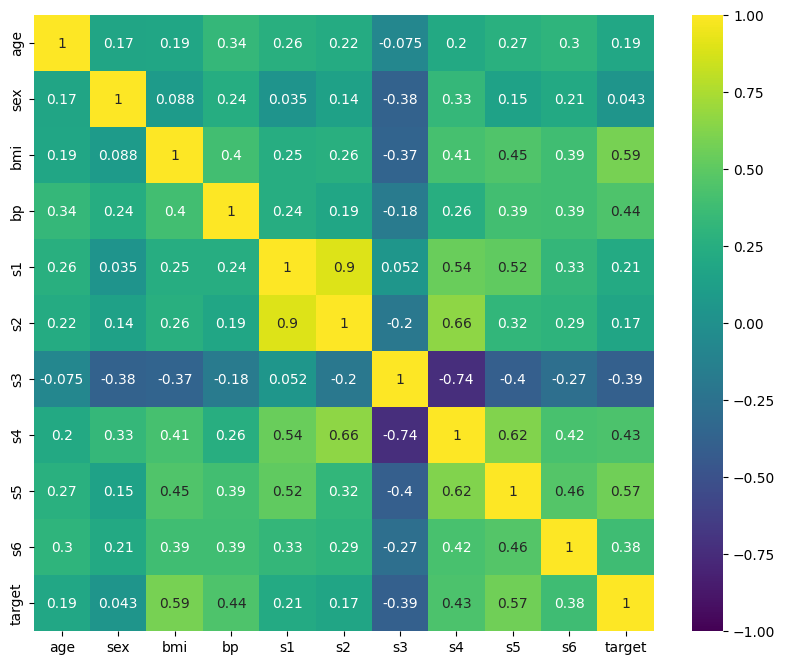

In [6]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap=mpl.cm.viridis);


In [7]:
df[col]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


## 次元削減

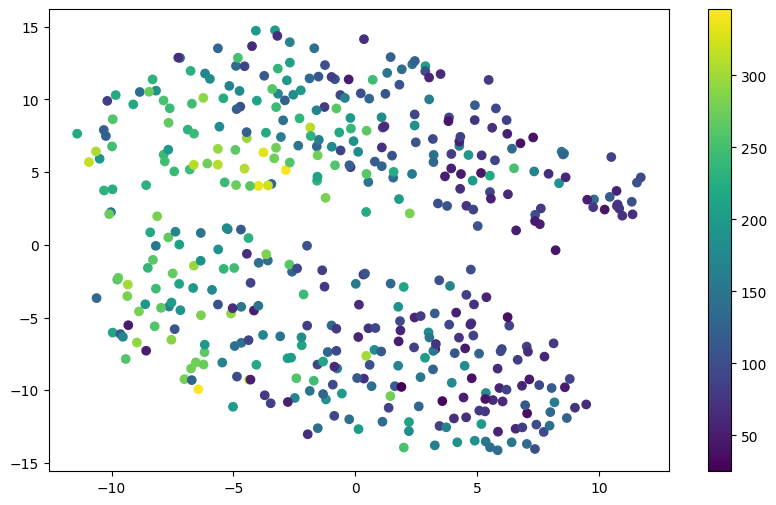

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 50, n_iter = 1000)
X_embedded = tsne.fit_transform(df[col])

ddf = pd.concat([df, pd.DataFrame(X_embedded, columns = ['col1', 'col2'])], axis = 1)

plt.figure(figsize = (10, 6))
plt.scatter(ddf['col1'],  
            ddf['col2'],
            c=ddf.target)
plt.colorbar()

In [9]:
ddf

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,col1,col2
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0,0.540376,4.320914
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0,4.769742,-5.396463
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0,1.561646,4.620271
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0,-2.775769,-7.803982
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0,-0.969410,-5.546695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508,178.0,-0.961535,6.745977
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254,104.0,-1.238271,12.365291
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674,132.0,3.214526,5.693133
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154,220.0,-4.056286,-8.253285


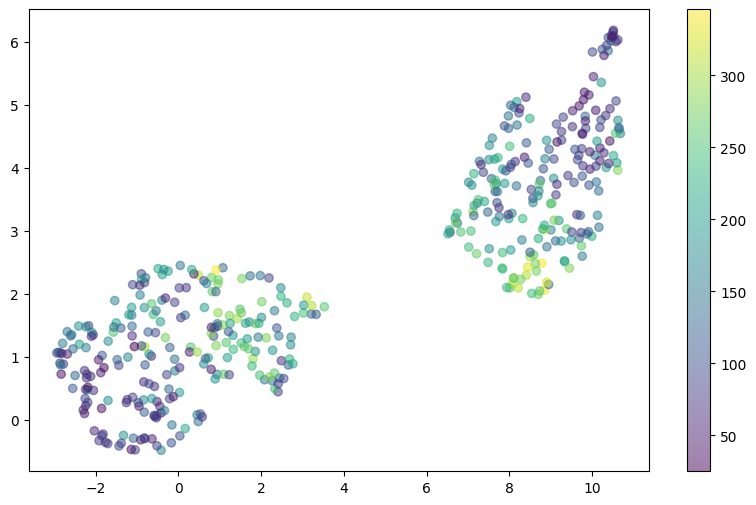

In [18]:
from umap import UMAP
mapper = UMAP()
mapper.fit(df[col])
embedding = mapper.transform(df[col])
plt.figure(figsize = (10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df.target, alpha=0.5)
plt.colorbar()
plt.show()

### 教師なし学習

## 教師あり学習

In [22]:


from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
X_norm = df[col].values
#xm_c = kmeans_plusplus_initializer(X_norm, 2).initialize()
xm_i = xmeans(data=X_norm, kmax=20, ccore=True)
xm_i.process()

# 結果をプロット
z_xm = np.ones(X_norm.shape[0])
for k in range(len(xm_i._xmeans__clusters)):
    z_xm[xm_i._xmeans__clusters[k]] = k+1

plt.subplot(4, 1, 2)
plt.scatter(x,y, c=z_xm)
centers = np.array(xm_i._xmeans__centers)
plt.scatter(centers[:,0],centers[:,1],s=250, marker='*',c='red')
plt.show()

AttributeError: module 'numpy' has no attribute 'warnings'

In [19]:
!pip install numpy==1.23.4

In [20]:
!pip3 install pyclustering

In [39]:
!pip install umap-learn

In [40]:
import umap

ModuleNotFoundError: No module named 'umap'